<a href="https://colab.research.google.com/github/Tamilarasit/Mycodes/blob/main/2_Custom_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the modules and packages**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


from sklearn.metrics import confusion_matrix , classification_report

# Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()  # Dataset contains images and labels

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
y_train = y_train.reshape(-1,)  # reshape 2D to 1D
y_test = y_test.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Plot an image

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

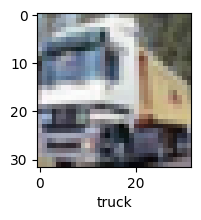

In [6]:
plot_sample(X_train, y_train, 1)

Normalizing the training data

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Build simple artificial neural network for image classification**
1.Creating a model

In [8]:
simple_cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
simple_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

2. Compiling a model
   --- completely ready to use

In [10]:
simple_cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

3.Train the model

In [11]:
history=simple_cnn.fit(X_train, y_train, epochs=2,validation_data=(X_test,y_test))

Epoch 1/2
1563/1563 [==============================] - 48s 30ms/step - loss: 2.0018 - accuracy: 0.2760 - val_loss: 1.7285 - val_accuracy: 0.3813
Epoch 2/2
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5928 - accuracy: 0.4275 - val_loss: 1.6017 - val_accuracy: 0.4362


# **Testing the performance of the model**
1. Evaluate the model

In [12]:
simple_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.6017 - accuracy: 0.4362


[1.601668119430542, 0.43619999289512634]

2.Predictability of the unknown data

In [13]:
y_pred = simple_cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.48      0.50      1000
           1       0.49      0.68      0.57      1000
           2       0.31      0.39      0.35      1000
           3       0.41      0.11      0.17      1000
           4       0.53      0.18      0.27      1000
           5       0.65      0.17      0.26      1000
           6       0.36      0.76      0.49      1000
           7       0.57      0.42      0.48      1000
           8       0.44      0.63      0.52      1000
           9       0.41      0.55      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.41     10000
weighted avg       0.47      0.44      0.41     10000



3.Pictorial representation of the model's performance

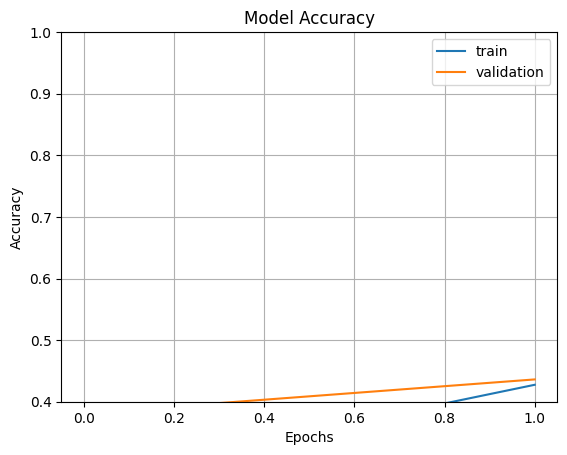

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Confusion Matrix
1.Compute the confusion matrix

In [15]:
con_mat=confusion_matrix(y_test,y_pred_classes)

2.Plot the confusion matrix

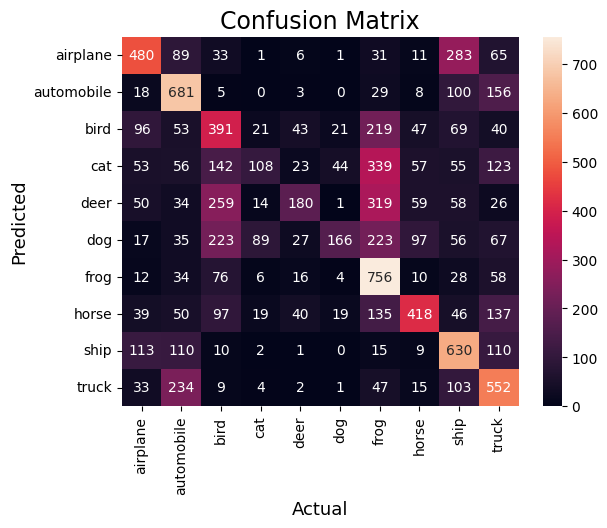

In [17]:
import seaborn as sns
sns.heatmap(con_mat,annot=True,fmt='g',xticklabels=classes,yticklabels=classes)
plt.ylabel('Predicted',fontsize=13)
plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()